**Note to grader:** Each question is assigned with a score. The final score  will be (sum of actual scores)/(sum of maximum scores)*100. The grading rubrics are shown in the TA guidelines.

# **Assignment 3**

The goal in this assignment to work a little more with Python, do some practice with logistic regression, reflect on how it can fail to work on linearly separable data. You will also work with a support vector classifier. All that, still on "toy" data sets.

We will work with the first 'real' data sets in the next assignment.

## **Preparation Steps**

In [690]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [691]:
# ### Reading-in the Iris data
# Iris data description: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html#:~:text=The%20Iris%20Dataset%20contains%20four,model%20to%20classify%20the%20species.

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


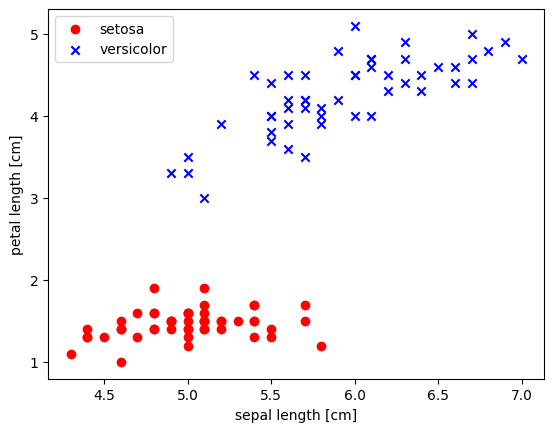

In [692]:
# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [693]:
# function for visualizing decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 1. Practice with logistic regression** </font>

Let's first load the textbook's implementation of logistic regression with gradient descent.

In [694]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # compute the logistic `loss`
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set.

In [695]:
X[0:3], y[0:3]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3]]),
 array([-1, -1, -1]))


Suppose the initial weights of the logistic neuron are w0=0.1, w1=-0.2, w2=0.1

<font color = 'blue'> **Q1-1**.  </font> Write the weights after processing data points 0,1,2, with learning rate $\eta=0.1$ and show your calculations. This is similar to the previous assignment, only done now for the logistic neuron. You can also use *LogisticRegressionGD* to check your calculations. [10 pts] <br>

<font color = 'blue'> **Q1-2**.  </font> Given our data $X$, let $X_{d=2}$ and $X_{d=3}$ be the quadratic and cubic features. Using PolynomialFeatures from sklearn.preprocessing, generate $X_{d=2}$ and $X_{d=3}$ [10 pts]

<font color = 'blue'> **Q1-3**.  </font> Using *LogisticRegressionGD* fit $X$, $X_{d=2}$ and $X_{d=3}$. Here you should set $\eta = 10e-9$ and $n_{iter}>1000$. For each of these three cases, report the loss function value for the model computed by *LogisticRegressionGD*.
Here it is expected that the loss value decreases as $d$ increases. [10 pts]

<font color = 'blue'> **Q1-4**.  </font> Using *LogisticRegressionGD* fit $X$. Here you need to find proper $\eta$ value to obtain a decent classifier. Report training accuracy and plot the decision region. [10 pts]

HINTS:

---

Q1-1: You can treat the three data points as a batch and do one update for the entire batch.
Or you can use stochastic gradient descend which will look at one sample at a time.
Look at the LogisticRegressionGD.fit() function.
Define w and eta, calculate net input, calculate logistic sigmoid activation, calculate errors, then update w.

Q1-2: from sklearn.preprocessing import PolynomialFeatures

Q1-3: print fit().loss_

In [696]:
# change labels from -1 to 0:
# this is required in logistic regression
y = np.where(y == -1, 0, y)


[0.039891480248067886, -0.4983910086360458, 0.017061640282123296]
Loss function value for d={}: {} [71.3453007390656, 71.34086074918076, 71.33642314369803, 71.3319879208708, 71.32755507895348, 71.32312461620182, 71.31869653087273, 71.31427082122421, 71.30984748551559, 71.30542652200731, 71.30100792896104, 71.29659170463961, 71.29217784730703, 71.28776635522857, 71.2833572266706, 71.27895045990076, 71.2745460531878, 71.27014400480171, 71.26574431301364, 71.26134697609595, 71.25695199232216, 71.25255935996698, 71.2481690773063, 71.24378114261725, 71.23939555417807, 71.23501231026819, 71.23063140916824, 71.22625284916009, 71.22187662852664, 71.21750274555212, 71.21313119852189, 71.20876198572243, 71.2043951054415, 71.20003055596797, 71.19566833559189, 71.19130844260451, 71.18695087529822, 71.18259563196668, 71.17824271090458, 71.17389211040792, 71.16954382877375, 71.16519786430041, 71.16085421528734, 71.1565128800352, 71.15217385684574, 71.14783714402196, 71.14350273986804, 71.13917064268

<ipython-input-693-f03d03a89cdf>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


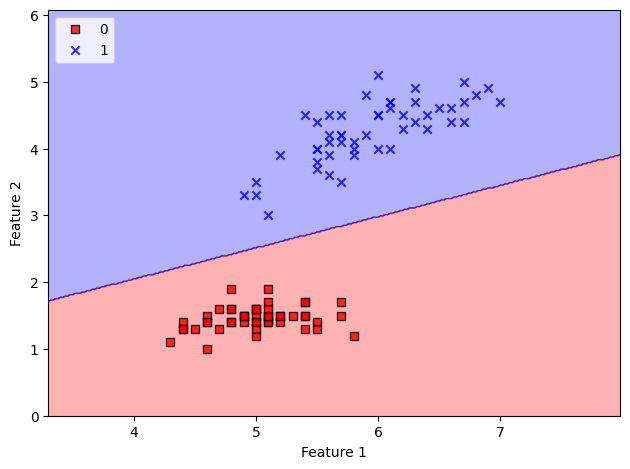

In [697]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Q1-1
import math
w = [0.1, -0.2, 0.1]
y_ = y[0:3]
x_ = X[0:3]
for i in x_:
  z = w[0] + w[1] * i[0] + w[2] * i[1]
  sigmoid = 1 / (1 + math.pow(math.e, -z))
  error = y_ - sigmoid
  w[0] += (0.1 * error[0])
  w[1:] += (0.1 * error[1:] * i)
print(w)
# Q1-2
# Generate quadratic and cubic features
poly2 = PolynomialFeatures(degree=2)
Xd2 = poly2.fit_transform(X)

poly3 = PolynomialFeatures(degree=3)
Xd3 = poly3.fit_transform(X)

# Q1-3
# Fit the models and report the loss function value
for Xd in [Xd2, Xd3]:
    model = LogisticRegressionGD(eta=10e-9, n_iter=10000)
    model.fit(Xd, y)
    print('Loss function value for d={}: {}', model.loss_)

# Q1-4
# Find a proper learning rate to obtain a decent classifier
eta = 0.01
model = LogisticRegressionGD(eta=eta, n_iter=1000)
model.fit(X, y)


# Report training accuracy
y_pred = model.predict(X)
accuracy = np.mean(y_pred == y)
print('Training accuracy: ', accuracy)

# Plot the decision region

# graph
plot_decision_regions(X, y, model)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [698]:
# Grader's area
maxScore = 0

# maxScore +=
# actualScore +=

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 2. SVM and classification margin**  </font>

The Iris dataset defined in above cells is linearly separable.

<font color = 'blue'> **Q3-1.**  </font> Use a [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) to learn a hyperplane $y=w_1x_1 +w_2x_2 +b$ that maximizes the margin for this Iris dataset. In your answer, specify a setting for the hyperparameter $C$ (it is denoted as $\gamma$ in the lecture slides) that reduces the amount of regularization, i.e. it incentivizes very small slacks. [10 pts]

<font color = 'blue'> **Q3-2.** </font> Extract the coefficients $w$ and the intercept $b$ from the learned SVC. Find the margin, $2/||w||_2$. Print out the coefficients, intercept, and the margin.
[Hint: Read the documentation in order to access the coefficients] [10 pts]

<font color = 'blue'> **Q3-3.** </font> Set $w = w/s$ and $b=b/s$ where $s=||w||_2$. This changes the numerical definition of the separation line, but the line is still the same. Print out new weights and intercept. Plot the decision with new weights and intercept. [10 pts]


**Note:** as with anything else, feel free to discuss this on Canvas.

Coefficients: [1.18086785e-03 1.81786114e+00], Intercept: -4.459721615271408, Margin: 1.1001938137664642
New Coefficients: [6.49591752e-04 9.99999789e-01], New Intercept: -2.4532790661210933


<ipython-input-693-f03d03a89cdf>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


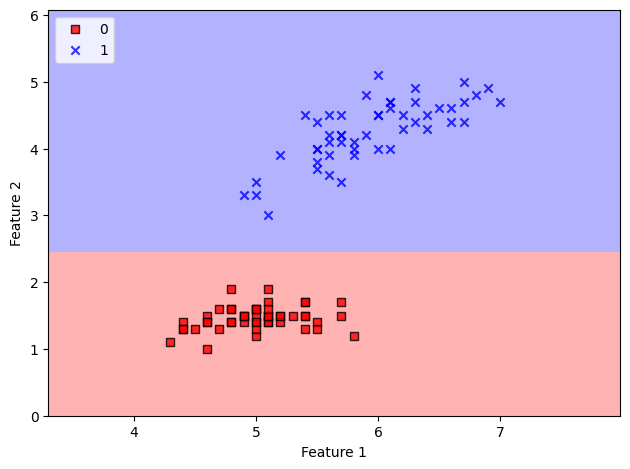

In [699]:
# Q3-1
# Train a LinearSVC
clf = svm.SVC(kernel='linear', C=1000.0)  # C is the hyperparameter for regularization
clf.fit(X, y)

# Q3-2
# Extract the coefficients and intercept
w = clf.coef_[0]
b = clf.intercept_[0]
# Calculate the margin
margin = 2 / np.linalg.norm(w)
print(f'Coefficients: {w}, Intercept: {b}, Margin: {margin}')

# Q3-3
# Normalize the coefficients and intercept
s = np.linalg.norm(w)
w_new = w / s
b_new = b / s
print(f'New Coefficients: {w_new}, New Intercept: {b_new}')

# Plot the decision boundary
plot_decision_regions(X, y, clf)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [700]:
# Grader's area

# maxScore +=
# actualScore +=


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 3. Classification with logistic regression and SVM.**  </font>

his assignment still focus on classification, utilizing two different classfiers that we explored in Week 4&5 (i.e., Logistic Regression and SVM). When using the SVM classifier, you have the option to select between a linear SVM or a nonlinear SVM, such as the *RBF kernel-based SVM*, which may offer an improved performance compared to using linear SVM. During the implementation, You're encouraged to use an established Python library (several useful links are provided below) that offers Logistic Regression and SVM classifiers for this homework.

------
<b>The main steps contain:</b>

- load breast cancer dataset; <font color= 'red'>*-- 5pts*</font>
- train two different classfiers (logistic regression and SVM classifiers) using five-fold cross validation (i.e., you will train 5 models with different fold, from which you will finally select the model); <font color= 'red'>*-- 20pts*</font>
- plot the "fold-wise" ROC-AUC curve during training, respectively; (ref. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py) <font color= 'red'>*-- 10pts*</font>
- make prediction using the best model dtermined by five-fold cross validation scores; <font color= 'red'>*-- 10pts*</font>
- produce the confusion matrices for both classifiers and evaluate the classification metrics, including test accuracy, precision, recall, and specificity. <font color= 'red'>*-- 10pts*</font>

At the end, please provide a few sentences to summarize your results and findings, such as the model selection process based on cross-validation, the outcomes or differences in terms of the evaluation metrics with Logistic Regression and SVM. <font color= 'red'>*-- 5pts*</font>

-------

**Useful links**:
- Logistic regression classifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- SVM classifier (linear and nonlinear):https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
- model selection using cross validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate; and https://scikit-learn.org/stable/modules/cross_validation.html.
- ROC-AUC curve: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
- ROC with cross validation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py



You may find other relavant methods that are helpful for this homework.


------

In [701]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# load breast cancer dataset

data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing datasets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print out train and test data shape
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)


# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




Training data shape:  (455, 30)
Testing data shape:  (114, 30)


Logistic Regression: [0.9840041279669762, 0.9845201238390093, 0.9989680082559339, 0.9932920536635707, 0.9974200206398349]
Logistic Regression confusion matrix:
[[160  10]
 [  1 284]]
Logistic Regression accuracy: 0.9758241758241758
Logistic Regression precision: 0.9659863945578231
Logistic Regression recall: 0.9964912280701754
Logistic Regression specificity : 0.9411764705882353

SVM: [0.999484004127967, 0.9886480908152735, 0.9989680082559339, 0.9896800825593395, 0.9958720330237358]
SVM confusion matrix:
[[162   8]
 [  4 281]]
SVM accuracy: 0.9736263736263736
SVM precision: 0.972318339100346
SVM recall: 0.9859649122807017
SVM specificity : 0.9529411764705882



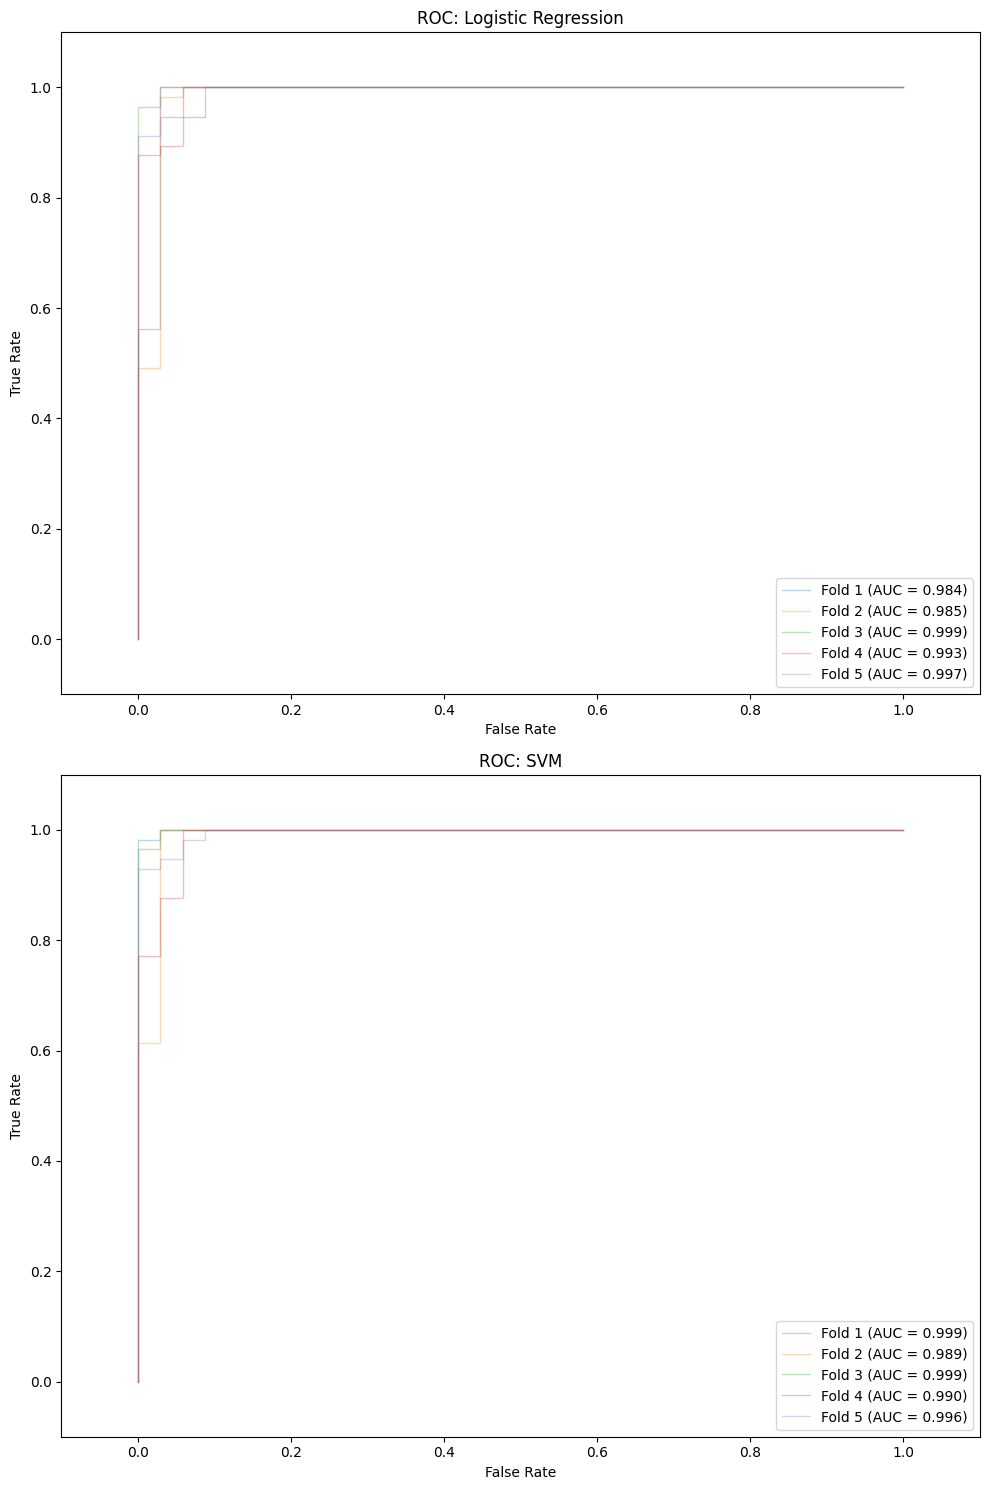

In [707]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

classifiers = [ ("Logistic Regression", LogisticRegression(max_iter=100000)), ("SVM", SVC(probability=True)) ]
cross = StratifiedKFold(n_splits=5)
plt.figure(figsize=(10, 15))
subplots = len(classifiers)
for i, (name, classifier) in enumerate(classifiers, start=1):
    plt.subplot(len(classifiers), 1, i)
    folds = []
    for j, (train, test) in enumerate(cross.split(X_train, y_train), start=1):
        classifier.fit(X_train[train], y_train[train])
        y_p = classifier.predict_proba(X_train[test])
        falseposr, trueposr, _ = roc_curve(y_train[test], y_p[:, 1])
        roc_auc = auc(falseposr, trueposr)
        folds.append(roc_auc)
        plt.plot(falseposr, trueposr, lw=1, alpha=0.3, label=f'Fold {j} (AUC = {roc_auc:.3f})')

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Rate')
    plt.ylabel('True Rate')
    plt.title(f'ROC: {name}')
    plt.legend(loc="lower right")
    y_predCV = cross_val_predict(classifier, X_train, y_train, cv=cross)
    confusion_var = confusion_matrix(y_train, y_predCV)
    accuracy = accuracy_score(y_train, y_predCV)
    precision = precision_score(y_train, y_predCV)
    recall = recall_score(y_train, y_predCV)
    specificity = confusion_var[0, 0] / (confusion_var[0, 0] + confusion_var[0, 1])
    print(f"{name}: {folds}")
    print(f"{name} confusion matrix:\n{confusion_var}")
    print(f"{name} accuracy: {accuracy}")
    print(f"{name} precision: {precision}")
    print(f"{name} recall: {recall}")
    print(f"{name} specificity : {specificity}\n")

plt.tight_layout()
plt.show()

The logist regression model seems to be better on all reported metrics. Accuracy, precision, recall, and speciificity are all better than the svm. When looking at the confusion matrix, you can see the difference in false positive and negatives too. Logistic has 8 false positive compared to SMV's 9. SVM additionaly has 5 false negatives compared to logistics's 3. This shows logistics slight improvement over svm in these models. You can review my model results below.

Logistic Regression: [0.9974489795918368, 0.9887755102040816, 1.0, 0.9918367346938776, 0.9984693877551021]
Logistic Regression confusion matrix:
[[167   8]
 [  3 277]]
Logistic Regression accuracy: 0.9758241758241758
Logistic Regression precision: 0.9719298245614035
Logistic Regression recall: 0.9892857142857143
Logistic Regression specificity : 0.9542857142857143

SVM: [0.9979591836734694, 0.9887755102040816, 1.0, 0.9933673469387755, 0.9974489795918368]
SVM confusion matrix:
[[166   9]
 [  5 275]]
SVM accuracy: 0.9692307692307692
SVM precision: 0.9683098591549296
SVM recall: 0.9821428571428571
SVM specificity : 0.9485714285714286

-----------------------
-----------------------
-----------------------


In [ ]:
# Grader's area

# score = actualScore*100/maxScore